In [1]:
# Import required libraries
import numpy as np
from tqdm import tqdm
import concurrent.futures
import numba as nb
from matplotlib import pyplot as plt

In [176]:
# Set parameters for simulation
farm_population = 1
packer_population = 1
distributor_population = 1
retailer_population = 1
customer_population = 5000

plot_per_farm = 1856
box_per_P = 31562
box_per_D = 31562
box_per_R = 31562

box_per_plot = 17
contamination_rate = 0.06
number_plot = farm_population * plot_per_farm
number_box = number_plot * box_per_plot

D_test_rate = 0.0
R_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

iterations = 10

# Test cost at each stage
test_cost_F = 350
test_cost_P = 50
test_cost_D = 50
test_cost_R = 50

# Customer demand
box_cap = 50
customer_number = number_box * box_cap
customer_demand = np.maximum(1, np.abs(np.random.normal(1, 2, size=customer_number)).astype(int))


# Customer illness cost
ill_rate = 0.04
hospital_rate = 0.0164
death_rate = 0.000041
ill_compensation = 719
hospital_compensation = 18438
death_compensation = 1764112

# Recall and Trace cost
unit_recall_labor_cost = 10
unit_trace_labor_cost = 10
price_per_box = 100

# Transportation cost
unit_trans_cost = 0.007
cost_indicator = 1
F_P_distance = 5
P_D_distance = 2983
D_R_distance = 11


In [4]:
import numpy as np

box_cap = 50
customer_number = number_box * box_cap
customer_demand = np.maximum(1, np.abs(np.random.normal(1, 2, customer_number)))
box_ids_R_C = np.random.choice(range(number_box), size=number_box, replace=False)

boxes_allotted = np.zeros(customer_number, dtype=int)
rem_contaminated_boxes = []

for i in range(customer_number):
    customer_box_count = min(box_cap, number_box - box_ids_R_C[i])
    boxes_allotted[i:i+customer_box_count] = box_ids_R_C[i:i+customer_box_count]
    if box_ids_R_C[i] < number_box - box_cap:
        rem_contaminated_boxes.append(i)

print(f"Number of customers who got boxes: {len(set(boxes_allotted))}")
print(f"Number of customers who have boxes allotted to them to be in rem_contaminated_boxes: {len(rem_contaminated_boxes)}")


ValueError: could not broadcast input array from shape (49,) into shape (50,)

In [177]:
len(customer_demand)-50*number_box

0

In [181]:
import numpy as np

#box_cap = 50
#number_box = len(box_ids)
#customer_number = number_box * box_cap
# Create array of customer demands
#customer_demand = np.maximum(1, np.random.normal(1, 2, customer_number).astype(int))

# Allocate boxes to customers based on their demand
boxes_allotted = np.zeros((customer_number,2),dtype=int)
all_boxes= box_ids_R_C
boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
current_box_cap = box_cap
current_box_id = 0
current_box_contaminated = contamination_mask[current_box_id]
#customer_demand = np.sort(customer_demand)[::-1]
for i, current_customer_demand in enumerate(customer_demand):
    if current_customer_demand == 0:
        continue
    else:
        if current_box_cap - current_customer_demand >= 0:
            #boxes_allotted[i,0]=all_boxes[current_box_id]
            current_box_cap -= current_customer_demand
            boxes_allotted_cont[i]=current_box_contaminated
            if current_box_cap == 0:
                current_box_id += 1
                current_box_contaminated = contamination_mask[current_box_id]
                current_box_cap = box_cap
        else: 
            #boxes_allotted[i,0]=all_boxes[current_box_id]
            current_box_id += 1
            print(current_box_id)
            cont= contamination_mask[current_box_id]
            current_box_cap = box_cap - current_customer_demand - current_box_cap
            boxes_allotted_cont[i]=cont+current_box_contaminated 
            current_box_contaminated = cont
            #boxes_allotted[i,1]=all_boxes[current_box_id]
customers_contaminated[iteration] = sum(boxes_allotted_cont)

ill_number = np.random.rand(customers_contaminated, 1)
hospital_number = np.random.rand(customers_contaminated, 1)
death_number = np.random.rand(customers_contaminated, 1)

death_number = death_number < death_rate
death_case_number[iteration] = np.sum(death_number)
hospital_number = hospital_number < hospital_rate
hospital_case_number[iteration] = np.sum(hospital_number)
ill_number = ill_number < ill_rate
ill_case_number[iteration] = np.sum(ill_number)




5
6
7
9
10
11
13
14
17
18
19
20
22
24
26
29
30
32
35
36
37
38
39
44
45
46
48
49
54
56
58
59
68
70
72
73
76
78
80
83
84
85
86
89
91
93
94
95
99
102
103
106
107
115
116
118
120
123
124
125
127
129
130
131
132
133
134
135
138
140
142
146
147
148
151
153
155
156
158
159
162
163
165
168
169
171
174
177
180
181
183
184
186
189
191
195
197
199
200
202
207
208
209
213
214
216
217
218
222
224
230
231
234
237
238
239
240
242
244
247
248
253
257
263
267
268
271
277
278
280
282
284
287
288
291
294
300
301
305
306
307
313
315
317
318
321
322
323
325
326
329
330
335
336
338
341
347
348
351
352
353
354
356
357
358
360
361
364
365
366
368
374
375
381
384
388
389
391
398
399
401
402
404
405
407
412
415
416
418
419
421
424
427
434
435
437
438
439
441
442
443
445
448
450
452
453
454
455
457
459
463
464
465
466
468
473
474
483
498
499
500
501
505
506
507
509
510
511
512
513
516
518
519
522
531
535
536
543
544
546
547
550
553
554
555
558
559
561
575
576
579
581
582
584
585
586
587
588
590
593
594
598
600
6

IndexError: index 27472 is out of bounds for axis 0 with size 27472

In [179]:
len(box_ids_R_C)
len(customer_demand)

1577600

In [143]:
global_var = 10

# Define a function that modifies the global variable
def increment_global_var():
    print(global_var)
increment_global_var()

10


In [ ]:
box_ids_F_P, contamination_mask, dropped_boxes_F

In [138]:
customers_contaminated = sum(boxes_allotted_cont)

ill_number = np.random.rand(customers_contaminated, 1)
ill_number

array([[0.92391747],
       [0.27180601],
       [0.28799551],
       ...,
       [0.18664845],
       [0.78556152],
       [0.75940698]])

In [115]:
boxes_allotted_cont[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [135]:
len(boxes_allotted[~boxes_allotted_cont])

1503994

In [134]:
len(boxes_allotted[boxes_allotted_cont])

73606

In [137]:
sum(boxes_allotted_cont)

73606

In [43]:
len(rem_contaminated_boxes)/len(all_boxes)

0.044928226470522775

In [38]:
len(rem_contaminated_boxes)/len(all_boxes)

0.044928226470522775

In [25]:
customer_number

1577600

In [44]:
print(boxes_allotted[30:50])
print(customer_demand[30:50])
print(sum(customer_demand[:31]))

[[10000100001 10000100002]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]]
[3 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 5]
52


In [36]:
print(boxes_allotted[30:50])
print(customer_demand[30:50])
print(sum(customer_demand[:31]))

[[10000100001 10000100002]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]
 [10000100002           0]]
[3 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 5]
52


In [20]:
print(sum(customer_demand)/50)
print (customer_box_id[-1])
print(current_box_id)
len(box_ids)


52467.22
1577571
55025


5000000

In [37]:
print(sum([len(dropped_boxes_F), len(dropped_boxes_P), len(dropped_boxes_D), len(dropped_boxes_R), contamination_mask.shape[0]]))
rem_contaminated_boxes=box_ids_R_C[contamination_mask]
len(rem_contaminated_boxes)
shuffled_box_ids_R_C = np.random.permutation(box_ids_R_C)
rem_contaminated_boxes1=shuffled_box_ids_R_C[contamination_mask]
print(len(rem_contaminated_boxes1))
print(len(rem_contaminated_boxes))
print(rem_contaminated_boxes[:10])
print(rem_contaminated_boxes1[:10])

5000000
201933
201933
[620085000019 570116000005  70210000008 550179800016 300189000015
 180128900010 460161000020 920151900010 900194400018  30160500020]
[ 680040400001  560190300013  180074100004   40154200020  830023800012
  120150200018  820066200018   80247200002 1000162100004  380090700001]


In [160]:
# Define functions 

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask

def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    box_ids = (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()
    return box_ids

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)
    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n

    return remaining_boxes, contamination_mask, dropped_boxes, sum(tested_boxes_mask)
# Cost Calculation 

# Transportation cost
def transportation_cost():
    trans_cost_F_P = (len(box_ids_F_P) // box_per_P +1 )* F_P_distance * unit_trans_cost
    trans_cost_P_D = (len(box_ids_P_D) // box_per_D +1 )* P_D_distance * unit_trans_cost
    trans_cost_D_R = (len(box_ids_D_R) // box_per_R + 1) * D_R_distance * unit_trans_cost
    return trans_cost_D_R+trans_cost_P_D+trans_cost_F_P

def testing_cost(tests_F,tests_P,tests_D,tests_R):
    return tests_F*test_cost_F+tests_P*test_cost_P+tests_D*test_cost_D+tests_R*test_cost_R

# Customer consumption and illness report 
def customer_illness_cost(box_ids_R_C,contamination_mask):
    boxes_allotted = np.zeros((customer_number,2),dtype=int)
    all_boxes= box_ids_R_C
    boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
    current_box_cap = box_cap
    current_box_id = 0
    current_box_contaminated = contamination_mask[current_box_id]
    #customer_demand = np.sort(customer_demand)[::-1]
    for i, current_customer_demand in enumerate(customer_demand):
        if current_customer_demand == 0:
            continue
        else:
            if current_box_cap - current_customer_demand >= 0:
                #boxes_allotted[i,0]=all_boxes[current_box_id]
                current_box_cap -= current_customer_demand
                boxes_allotted_cont[i]=current_box_contaminated
                if current_box_cap == 0:
                    current_box_id += 1
                    current_box_contaminated = contamination_mask[current_box_id]
                    current_box_cap = box_cap
            else: 
                #boxes_allotted[i,0]=all_boxes[current_box_id]
                current_box_id += 1
                cont= contamination_mask[current_box_id]
                current_box_cap = box_cap - current_customer_demand - current_box_cap
                boxes_allotted_cont[i]=cont+current_box_contaminated 
                current_box_contaminated = cont
                #boxes_allotted[i,1]=all_boxes[current_box_id]
    customers_contaminated = sum(boxes_allotted_cont)

    ill_number = np.random.rand(customers_contaminated, 1)
    hospital_number = np.random.rand(customers_contaminated, 1)
    death_number = np.random.rand(customers_contaminated, 1)

    death_number = death_number < death_rate
    death_case_number = np.sum(death_number)

    hospital_number = hospital_number < hospital_rate
    hospital_case_number = np.sum(hospital_number)

    ill_number = ill_number < ill_rate
    ill_case_number = np.sum(ill_number)
    cust_cost = death_case_number * death_compensation + hospital_case_number * hospital_compensation + ill_case_number * ill_compensation
    return cust_cost

def recall_cost():
    return sum(contamination_mask)* (unit_recall_labor_cost+unit_trace_labor_cost+price_per_box)
    

    
# Function to check if a value is in an array
#@nb.njit(parallel=True) 
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        if a[i] in b:
            out[i]=True
        else:
            out[i]=False
    return out


    
# Run testing and return the number of boxes dropped at each stage
def run_test():
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)    
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask, dropped_boxes_F,tests_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask, dropped_boxes_P,tests_P = run_stage(box_ids_F_P, contamination_mask, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask, dropped_boxes_D,tests_D = run_stage(box_ids_P_D, contamination_mask, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask, dropped_boxes_R,tests_R = run_stage(box_ids_D_R, contamination_mask, r_test_rate,box_per_plot)
    #box_ids_C, contamination_mask, dropped_boxes_C = run_stage(box_ids_R, contamination_mask, c_test_rate,box_per_plot)
    total_cost = transportation_cost()+testing_cost(tests_F,tests_P,tests_D,tests_R)+customer_illness_cost(box_ids_R_C,contamination_mask)+recall_cost()
    #return box_ids, box_ids_F_P, box_ids_P_D, box_ids_D_R, box_ids_R_C, contamination_mask, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R
    return total_cost


In [184]:
farm_population = 10
plot_per_farm = 1900
box_per_plot = 18

run_test() 

40261962.993

In [151]:
f_test_rate = 0.05
p_test_rate = 0.01
d_test_rate = 0.04
r_test_rate = 0.05
box_ids, box_ids_F_P, box_ids_P_D, box_ids_D_R, box_ids_R_C, contamination_mask, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R = run_test()
print(box_ids.shape)
print (box_ids_F_P.shape)
print (box_ids_P_D.shape)
print (box_ids_D_R.shape)
print (box_ids_R_C.shape)
print (np.sum(contamination_mask))
print(len(box_ids)-len(box_ids_R_C))
print(sum([len(dropped_boxes_F), len(dropped_boxes_P), len(dropped_boxes_D), len(dropped_boxes_R), contamination_mask.shape[0]]))

(31552,)
(30294,)
(29920,)
(28917,)
(27472,)
1459
4080
31552


100%|██████████| 59/59 [00:00<00:00, 636.90it/s]


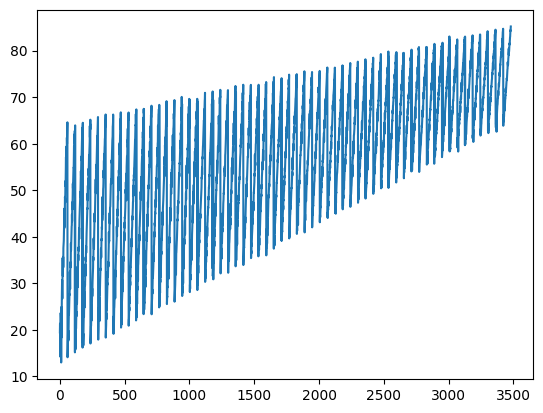

In [6]:

farm_population = 100
plot_per_farm = 50
box_per_plot = 50
contamination_rate = 0.06

d_test_rate = 0.0
r_test_rate = 0.0
c_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

for f_test_rate in tqdm(np.arange(0.01,0.6,0.01)):
    for p_test_rate in np.arange(0.01,0.6,0.01):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)


def run_simulation_wrapper(args):
    f_test_rate, p_test_rate = args
    return run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = []
    for f_test_rate in tqdm(np.arange(0.0,1,0.1)):
        for p_test_rate in np.arange(0.01,0.5,0.01):
            results.append(executor.submit(run_simulation_wrapper, (f_test_rate, p_test_rate)))

    for future in concurrent.futures.as_completed(results):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = future.result()
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)

plt.plot(detection_percent_l)
plt.show()


In [7]:
# Define functions 
# Only contaminated box is removed after testing at each stage
import numpy as np
from tqdm import tqdm
import concurrent.futures
import numba as nb

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask

# define testing at each stage
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes

#@nb.njit(parallel=True) 
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        if a[i] in b:
            out[i]=True
        else:
            out[i]=False
    return out

# Run simulation
def run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate,
                   d_test_rate, r_test_rate, c_test_rate):
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = np.array([generate_box_id(farm_idx, plot_idx, box_idx)
                        for farm_idx in range(1,farm_population+1)
                        for plot_idx in range(1,plot_per_farm+1)
                        for box_idx in range(1,box_per_plot+1)])
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)

    box_ids_F, contamination_mask, dropped_boxes_F = run_stage(box_ids, contamination_mask, f_test_rate)
    box_ids_P, contamination_mask, dropped_boxes_P = run_stage(box_ids_F, contamination_mask, p_test_rate)
    box_ids_D, contamination_mask, dropped_boxes_D = run_stage(box_ids_P, contamination_mask, d_test_rate)
    box_ids_R, contamination_mask, dropped_boxes_R = run_stage(box_ids_D, contamination_mask, r_test_rate)
    box_ids_C, contamination_mask, dropped_boxes_C = run_stage(box_ids_R, contamination_mask, c_test_rate)

    return box_ids, box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C


100%|██████████| 59/59 [00:00<00:00, 1941.82it/s]


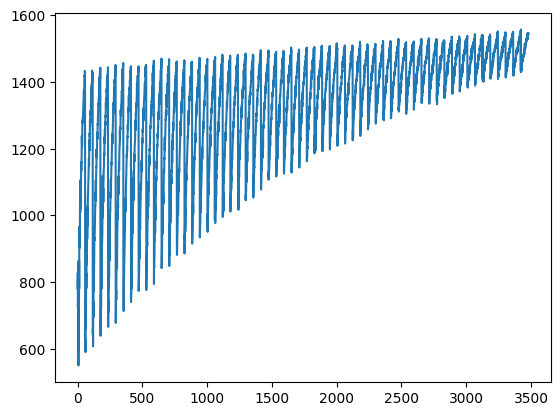

In [247]:
from tqdm import tqdm
import concurrent.futures
from matplotlib import pyplot as plt
farm_population = 100
plot_per_farm = 50
box_per_plot = 50
contamination_rate = 0.06

d_test_rate = 0.03
r_test_rate = 0.04
c_test_rate = 0.05

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]

def run_simulation_wrapper(args):
    f_test_rate, p_test_rate = args
    return run_simulation(farm_population, plot_per_farm, box_per_plot, contamination_rate, f_test_rate, p_test_rate, d_test_rate, r_test_rate, c_test_rate)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = []
    for f_test_rate in tqdm(np.arange(0.01,0.6,0.01)):
        for p_test_rate in np.arange(0.01,0.6,0.01):
            results.append(executor.submit(run_simulation_wrapper, (f_test_rate, p_test_rate)))

    for future in concurrent.futures.as_completed(results):
        box_ids,box_ids_C, dropped_boxes_F, dropped_boxes_P, dropped_boxes_D, dropped_boxes_R, dropped_boxes_C = future.result()
        box_ids_l.append(len(box_ids))
        box_ids_C_l.append(len(box_ids_C))
        dropped_boxes_F_l.append(len(dropped_boxes_F))
        dropped_boxes_P_l.append(len(dropped_boxes_P))
        dropped_boxes_D_l.append(len(dropped_boxes_D))
        dropped_boxes_R_l.append(len(dropped_boxes_R))
        dropped_boxes_C_l.append(len(dropped_boxes_C))
        detection_percent = ((len(box_ids)-len(box_ids_C))/(contamination_rate*len(box_ids)))*100
        detection_percent_l.append(detection_percent)

plt.plot(detection_percent_l)
plt.show()
